# Esame Data Science Lab in Environment and Physics

In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [214]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score


import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [2]:
# Initialize Dataset
pd.set_option('display.max_columns', 50)

## Esercizio Decision Tree

In [3]:
df = pd.read_csv("data/student-mat.csv")

In [4]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Ci sono due variabili che identificano l'utlizzo di alcolici: <b>Dalc</b> e <b>Walc</b> <br>
Dalc = consumo infrasettimanale di alcohol espresso su una scala 1-5.<br>
Walc = consumo nel weekend di alcohol espresso su una scala 1-5.

In [5]:
dalc=df['Dalc']

In [6]:
walc=df['Walc']

In [7]:
df.drop(['Dalc','Walc'], axis=1, inplace=True)

Creo delle variabili dummy a partire dalle variabili categoriche presenti.

In [8]:
df = pd.get_dummies(df)

In [9]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,...,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,...,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,...,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


Distribuzione della variabile <b>Dalc</b>

In [10]:
dalc.value_counts()

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

Distribuzione della variabile <b>Walc</b>

In [11]:
walc.value_counts()

1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df, walc, test_size=0.33, random_state=23, 
                                                    stratify=walc, shuffle=True)

Addestro un albero di decisione facendo fine-tuning sui tre parametri principali e utilizzando come target la variabile <b>Walc</b>

In [32]:
parameters = {
    "max_depth":np.arange(1,25,1),
    "max_features":np.arange(1,len(df.columns),1),
    "min_impurity_decrease":np.arange(1,101,1)/1000
}
walc_tree = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=-1, cv=10)
walc_tree.fit(X=x_train, y=y_train)
walc_best_model = walc_tree.best_estimator_
print (walc_tree.best_score_, walc_tree.best_params_) 

/anaconda3/envs/sinteftrial/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.4659090909090909 {'max_depth': 21, 'max_features': 31, 'min_impurity_decrease': 0.009}


In [33]:
tree.export_graphviz(walc_best_model, out_file='weekend_alcohol_consumption.dot', impurity=False,
                     feature_names=x_test.columns.values, rounded=True, filled=True)

Verifico i risultati anche sul test set.

In [34]:
walc_tree.score(x_test,y_test)

0.40458015267175573

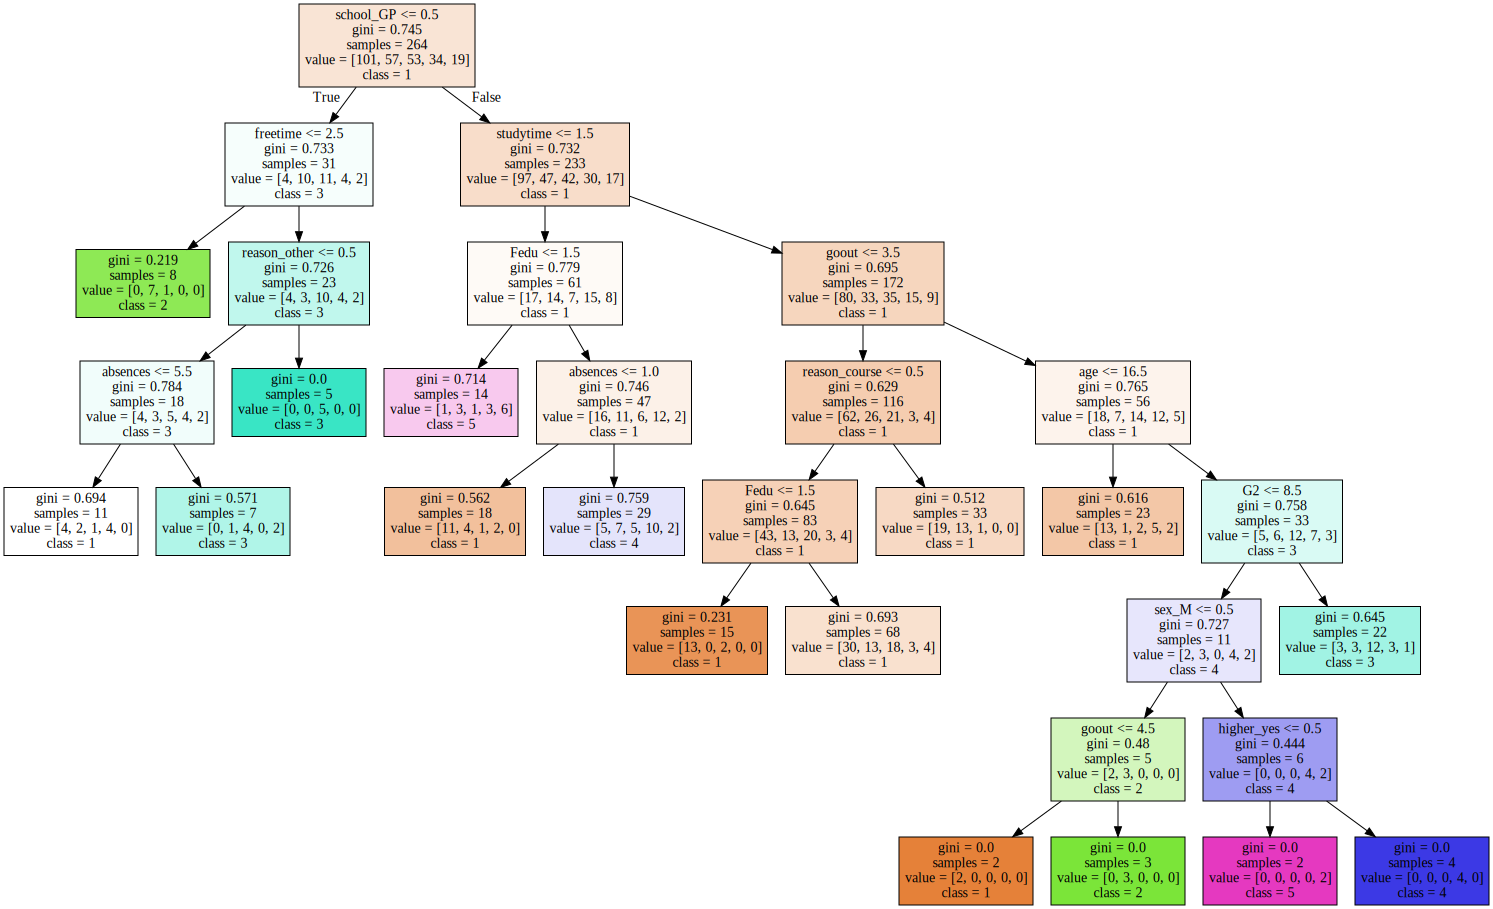

In [35]:
graph = Source(tree.export_graphviz(walc_best_model, out_file=None
   , feature_names=df.columns, class_names=['1','2','3','4','5'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

Addestro un albero di decisione facendo fine-tuning sui tre parametri principali e utilizzando come target la variabile <b>Dalc</b>

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df, dalc, test_size=0.33, random_state=23, 
                                                    stratify=dalc, shuffle=True)

In [37]:
parameters = {
    "max_depth":np.arange(1,25,1),
    "max_features":np.arange(1,len(df.columns),1),
    "min_impurity_decrease":np.arange(1,101,1)/1000
}
dalc_tree = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=-1, cv=10)
dalc_tree.fit(X=x_train, y=y_train)
dalc_best_model = dalc_tree.best_estimator_
print (dalc_tree.best_score_, dalc_tree.best_params_) 

/anaconda3/envs/sinteftrial/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7272727272727273 {'max_depth': 14, 'max_features': 35, 'min_impurity_decrease': 0.012}


In [38]:
tree.export_graphviz(dalc_best_model, out_file='midweek_alcohol_consumption.dot', impurity=False,
                     feature_names=x_test.columns.values, rounded=True, filled=True)

Verifico i risultati anche sul test set.

In [39]:
dalc_tree.score(x_test,y_test)

0.6793893129770993

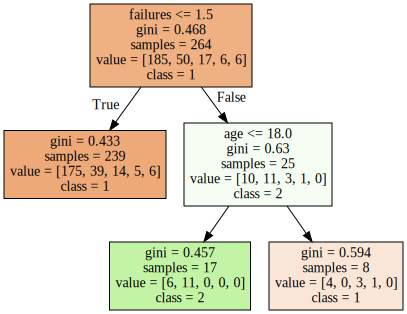

In [41]:
graph = Source(tree.export_graphviz(dalc_best_model, out_file=None
   , feature_names=df.columns, class_names=['1','2','3','4','5'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## Esercizio Regressione

In [169]:
df = pd.read_csv("data/admission.csv")

In [170]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [171]:
sns.set()
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

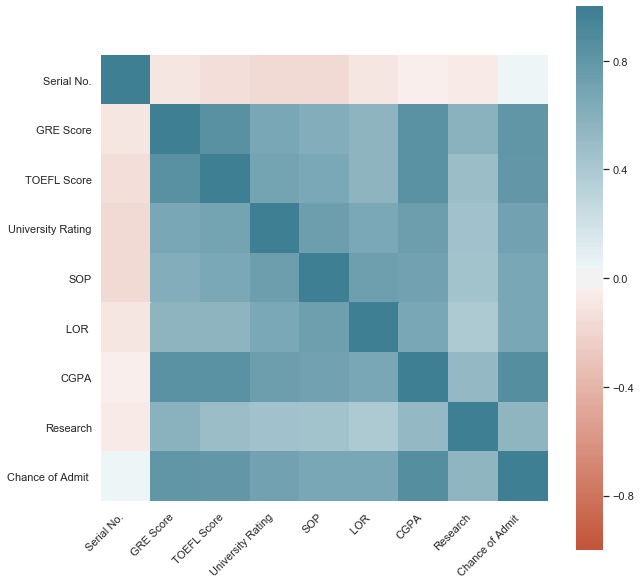

In [172]:
corr = df.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

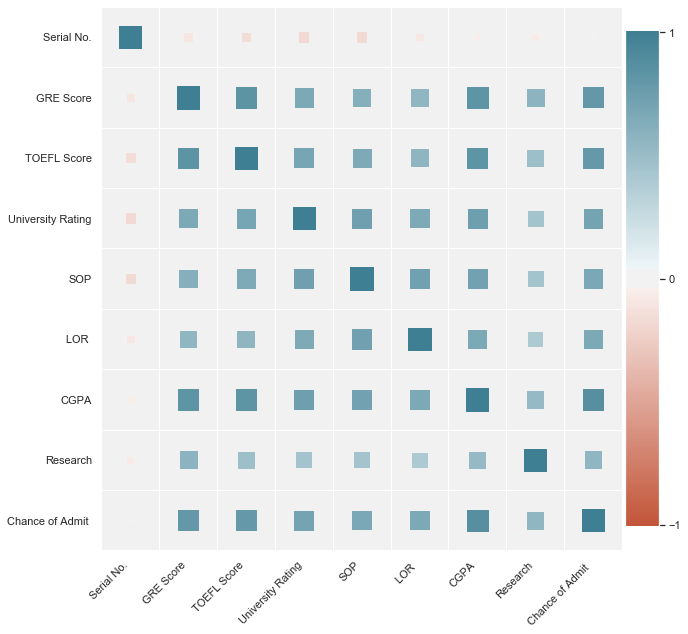

In [173]:
plt.figure(figsize=(10, 10))
corrplot(corr)

#### Tutte le variabili

In [162]:
df.drop(['Serial No.'], axis=1, inplace=True)

scaler = StandardScaler()

X = df.drop(["Chance of Admit "], axis=1)
y = df["Chance of Admit "]

scaler = scaler.fit(X)
X = scaler.transform(X)

X = sm.add_constant(X) # adding a constant, intercept
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

In [163]:
print("MSE train: %f" % mean_squared_error(y, y_pred))

MSE train: 0.003987


In [164]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 08 Sep 2019   Prob (F-statistic):          3.12e-134
Time:                        12:11:07   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7244      0.003    227.130      0.000       0.718       0.731
x1             0.0199      0.007      2.906      0.004       0.006       0.033
x2             0.0177      0.007      2.680      0.008       0.005       0.031
x3             0.0065      0.005      1.198      0.232      -0.004       0.017
x4            -0.0033      0.006     -0.594      0.553      -0.014       0.008
x5             0.0201      0.005      4.034      0.000       0.010       0.030
x6             0.0708      0.007      9.734      0.000       0.057       0.085
x7             0.0122      0.004      3.081      0.002       0.004       0.020
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                         5.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Variabili più correlate

In [165]:
corr = df.corr()

In [166]:
corr['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit , dtype: float64

In [174]:
scaler = StandardScaler()

X = df[["CGPA", "GRE Score"]]
y = df["Chance of Admit "]

scaler = scaler.fit(X)
X = scaler.transform(X)

X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     708.2
Date:                Sun, 08 Sep 2019   Prob (F-statistic):          1.13e-131
Time:                        12:11:45   Log-Likelihood:                 515.78
No. Observations:                 400   AIC:                            -1026.
Df Residuals:                     397   BIC:                            -1014.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7244      0.003    216.563      0.000       0.718       0.731
x1             0.0953      0.006     15.755      0.000       0.083       0.107
x2             0.0350      0.006      5.782      0.000       0.023       0.047
==============================================================================
Omnibus:                       83.609   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.975
Skew:                          -1.111   Prob(JB):                     1.23e-37
Kurtosis:                       5.293   Cond. No.                         3.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

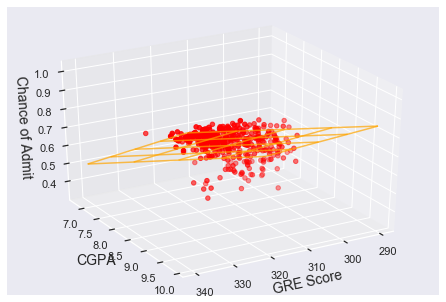

In [175]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df['GRE Score'], df["CGPA"],  df['Chance of Admit '], color='red')
ax.set_xlabel('GRE Score', fontsize=14)
ax.set_ylabel('CGPA', fontsize=14)
ax.set_zlabel("Chance of Admit ", fontsize=14)

x = np.linspace(df['GRE Score'].min(), df['GRE Score'].max(), 5)
y = np.linspace(df['CGPA'].min(), df['CGPA'].max(), 5)
x, y = np.meshgrid(x, y)

z = model.params['const'] + model.params['GRE Score'] * x + model.params['CGPA'] * y
z = z.reshape(x.shape)

ax.view_init(30, 60)
ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)
plt.show()

#### Solo CGPA

In [109]:
scaler = StandardScaler()

X = df["CGPA"]
X = X.values.reshape((len(X),1))
y = df["Chance of Admit "]

scaler = scaler.fit(X)
X = scaler.transform(X)

X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

In [110]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1279.
Date:                Sun, 08 Sep 2019   Prob (F-statistic):          2.34e-126
Time:                        11:56:18   Log-Likelihood:                 499.61
No. Observations:                 400   AIC:                            -995.2
Df Residuals:                     398   BIC:                            -987.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7244      0.003    208.246      0.000       0.718       0.731
x1             0.1244      0.003     35.759      0.000       0.118       0.131
==============================================================================
Omnibus:                       62.400   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.112
Skew:                          -0.926   Prob(JB):                     1.50e-23
Kurtosis:                       4.697   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

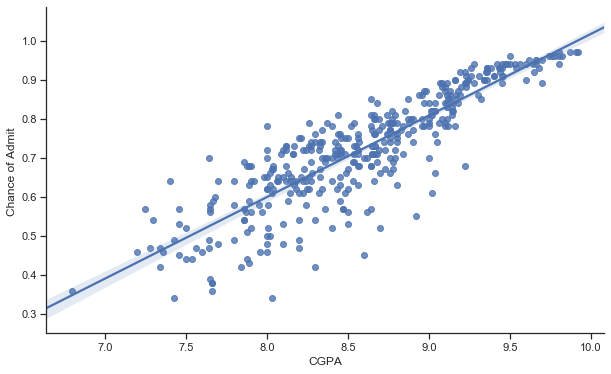

In [190]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.regplot(x="CGPA", y="Chance of Admit ", data=df, ax=ax)
sns.despine()

#### Solo GRE score

In [177]:
scaler = StandardScaler()

X = df["GRE Score"]
X = X.values.reshape((len(X),1))
y = df["Chance of Admit "]

scaler = scaler.fit(X)
X = scaler.transform(X)

X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

In [178]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     720.6
Date:                Sun, 08 Sep 2019   Prob (F-statistic):           2.46e-91
Time:                        12:14:48   Log-Likelihood:                 418.65
No. Observations:                 400   AIC:                            -833.3
Df Residuals:                     398   BIC:                            -825.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7244      0.004    170.088      0.000       0.716       0.733
x1             0.1143      0.004     26.843      0.000       0.106       0.123
==============================================================================
Omnibus:                       52.605   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.715
Skew:                          -0.860   Prob(JB):                     1.33e-17
Kurtosis:                       4.307   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

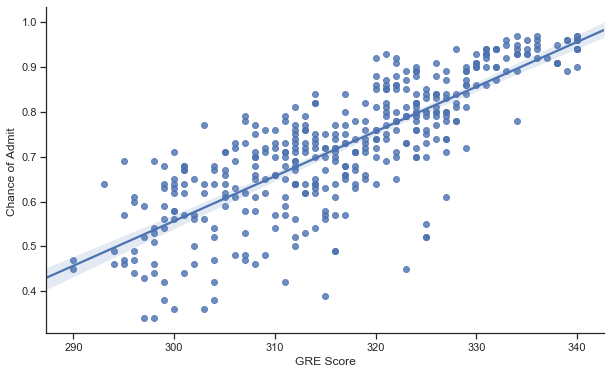

In [189]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.regplot(x="GRE Score", y="Chance of Admit ", data=df, ax=ax)
sns.despine()

## Esercizio clustering e classificazione con NN

In [206]:
df = pd.read_csv("data/wine.csv")

In [207]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [208]:
df.head()

,alcohol,malic_acid,ash,alcalinity_ash,agnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


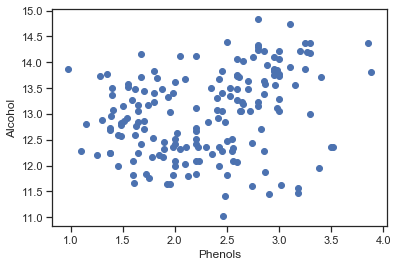

In [209]:
phenols = df.phenols
alcohol = df.alcohol
plt.scatter(phenols, alcohol)
plt.xlabel("Phenols")
plt.ylabel("Alcohol")
plt.show()

#### Metodo Elbow

Text(0, 0.5, 'Within-cluster Sum of Squares')

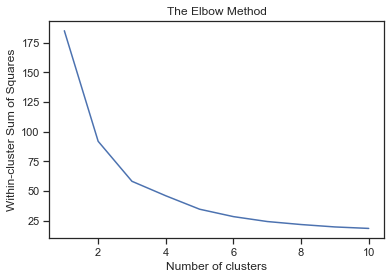

In [210]:
wcss = []
number_clusters = range(1, 11)

for i in number_clusters:
    kmeans= KMeans(i)
    kmeans.fit(df[["phenols","alcohol"]])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    

plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

#### Metodo Silhouette

In [220]:
for i in range(2,11):
    clusterer = KMeans (n_clusters=i)
    preds = clusterer.fit_predict(df[["phenols","alcohol"]])
    centers = clusterer.cluster_centers_

    score = silhouette_score (df[["phenols","alcohol"]], preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(i, score))

For n_clusters = 2, silhouette score is 0.43791245362075487)
For n_clusters = 3, silhouette score is 0.4387764538708029)
For n_clusters = 4, silhouette score is 0.4019796687333131)
For n_clusters = 5, silhouette score is 0.3854562328004668)
For n_clusters = 6, silhouette score is 0.38865893736176216)
For n_clusters = 7, silhouette score is 0.3905425771122393)
For n_clusters = 8, silhouette score is 0.3531674740829746)
For n_clusters = 9, silhouette score is 0.3665566280107408)
For n_clusters = 10, silhouette score is 0.371238393371182)


#### Clustering

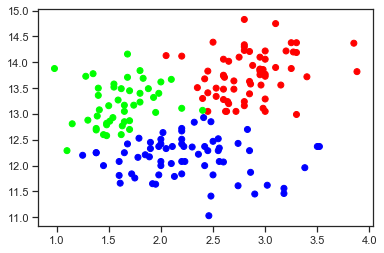

In [223]:
x = df[["phenols","alcohol"]]

kmeans = KMeans(3)
kmeans.fit(x)

clusters = kmeans.fit_predict(x)
data_clust = x.copy()
data_clust['Cluster'] = clusters

plt.scatter(data_clust['phenols'], data_clust['alcohol'], c=data_clust['Cluster'], cmap='brg')
plt.show()

#### Classificazione con NN

In [299]:
df = pd.read_csv("data/wine-with-answers.csv")

In [300]:
df['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [301]:
from sklearn.preprocessing import OneHotEncoder
X = df.drop("class", axis = 1)
y = df["class"]

enc = preprocessing.OneHotEncoder()
y = np.array(y).reshape(-1,1)
enc.fit(y)
y = enc.transform(y).toarray()

scaler = scaler.fit(X)
X = scaler.transform(X)

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [303]:
model = Sequential() #inizializza il modello

# Aggiungo livello di input
model.add(Dense(13, activation='relu', input_shape=(13,)))

model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [304]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 21        
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [305]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [306]:
model.fit(X_train, y_train,epochs=30, batch_size=1, verbose=1)

Epoch 1/30
119/119 [==============================] - 2s 16ms/step - loss: 1.2379 - acc: 0.3025
Epoch 2/30
119/119 [==============================] - 0s 4ms/step - loss: 0.9582 - acc: 0.4034
Epoch 3/30
119/119 [==============================] - 0s 4ms/step - loss: 0.8154 - acc: 0.7059
Epoch 4/30
119/119 [==============================] - 0s 4ms/step - loss: 0.6975 - acc: 0.7983
Epoch 5/30
119/119 [==============================] - 0s 4ms/step - loss: 0.5823 - acc: 0.8403
Epoch 6/30
119/119 [==============================] - 0s 4ms/step - loss: 0.4911 - acc: 0.8403
Epoch 7/30
119/119 [==============================] - 0s 4ms/step - loss: 0.4228 - acc: 0.8908
Epoch 8/30
119/119 [==============================] - 0s 4ms/step - loss: 0.3649 - acc: 0.9076
Epoch 9/30
119/119 [==============================] - 0s 4ms/step - loss: 0.3059 - acc: 0.9328
Epoch 10/30
119/119 [==============================] - 0s 4ms/step - loss: 0.2489 - acc: 0.9496
Epoch 11/30
119/119 [===========================

In [307]:
score = model.evaluate(X_test, y_test,verbose=1)

print('Loss = ',round(score[0],3),' , Accuracy = ',score[1])

59/59 [==============================] - 0s 5ms/step
Loss =  0.004  , Accuracy =  1.0


In [308]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

[[18  0  0]
 [ 0 26  0]
 [ 0  0 15]]


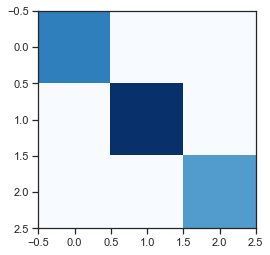

In [309]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues)